# Time Series Components
Time series analysis provides a body of techniques to better understand a dataset. <br>
The most useful of these is the decomposition of a time series into 4 constituent parts:
* **Level.** The baseline value for the series if it were a straight line.
* **Trend.** The optional and often linear increasing or decreasing behavior of the series over
time.
* **Seasonality.** The optional repeating patterns or cycles of behavior over time.
* **Noise.** The optional variability in the observations that cannot be explained by the model

Time series data often requires cleaning, scaling, and even transformation. For example:<br> 
* **Frequency.** Data is provided at a frequency that is too high to model <br> or is unevenly                    spaced through time requiring resampling for use in some models.
* **Outliers.** There are corrupt or extreme outlier values that need to be identied and handled.
* **Missing.** There are gaps or missing data that need to be interpolated or imputed.

## Data preparation

### Load Time Series Data

In [2]:
# load dataset using read_csv()
from pandas import read_csv
series = read_csv('TP.csv', header=0, parse_dates=[0], index_col=0, squeeze=True)
print(type(series))
print(series.head())

<class 'pandas.core.series.Series'>
date
2019-01-01       NaN
2019-01-02    2140.0
2019-01-03    1916.0
2019-01-04    1792.0
2019-01-05     804.0
Name: volume, dtype: float64


* header=0: We must specify the header information at row 0.
* parse dates=True: We give the function a hint that data in the firt column contains dates that need to be parsed.
* index col=0: We hint that the frst column contains the index information for the time series.
* squeeze=True: We hint that we only have one data column and that we are interested in a Series and not a DataFrame.

In [3]:
print(series.size)

578


In [4]:
print(series['2019-01'])

date
2019-01-01       NaN
2019-01-02    2140.0
2019-01-03    1916.0
2019-01-04    1792.0
2019-01-05     804.0
2019-01-06       NaN
2019-01-07    2230.0
2019-01-08    1791.0
2019-01-09    1748.0
2019-01-10    1555.0
2019-01-11    1487.0
2019-01-12     748.0
2019-01-13       NaN
2019-01-14    2117.0
2019-01-15    1710.0
2019-01-16    1594.0
2019-01-17    1438.0
2019-01-18    1361.0
2019-01-19     639.0
2019-01-20       NaN
2019-01-21    2095.0
2019-01-22    1539.0
2019-01-23    1587.0
2019-01-24    1459.0
2019-01-25    1389.0
2019-01-26     653.0
2019-01-27       NaN
2019-01-28    1966.0
2019-01-29    1534.0
2019-01-30    1539.0
2019-01-31    1412.0
Name: volume, dtype: float64


In [5]:
print(series.describe())

count     481.000000
mean     1191.049896
std       417.304692
min         2.000000
25%      1047.000000
50%      1231.000000
75%      1447.000000
max      2500.000000
Name: volume, dtype: float64


## Feature Engineering

In [6]:
# create date time features of a dataset
from pandas import DataFrame
dataframe = DataFrame()
dataframe['month'] = [series.index[i].month for i in range(len(series))]
dataframe['day'] = [series.index[i].day for i in range(len(series))]
dataframe['volume'] = [series[i] for i in range(len(series))]
print(dataframe.head(5))

   month  day  volume
0      1    1     NaN
1      1    2  2140.0
2      1    3  1916.0
3      1    4  1792.0
4      1    5   804.0


## Lag Feature

In [7]:
# create a lag feature
from pandas import concat
temps = DataFrame(series.values)
dataframe = concat([temps.shift(1), temps], axis=1)
dataframe.columns = ['t', 't+1']
print(dataframe.head(5))

        t     t+1
0     NaN     NaN
1     NaN  2140.0
2  2140.0  1916.0
3  1916.0  1792.0
4  1792.0   804.0


In [8]:
# create lag features
temps = DataFrame(series.values)
dataframe = concat([temps.shift(3), temps.shift(2), temps.shift(1), temps], axis=1)
dataframe.columns = ['t-2', 't-1', 't', 't+1']
print(dataframe.head(5))

      t-2     t-1       t     t+1
0     NaN     NaN     NaN     NaN
1     NaN     NaN     NaN  2140.0
2     NaN     NaN  2140.0  1916.0
3     NaN  2140.0  1916.0  1792.0
4  2140.0  1916.0  1792.0   804.0


## Rolling Window Statistics

In [9]:
# create a rolling mean feature
temps = DataFrame(series.values)
shifted = temps.shift(1)
window = shifted.rolling(window=2)
means = window.mean()
dataframe = concat([means, temps], axis=1)
dataframe.columns = ['mean(t-1,t)', 't+1']
print(dataframe.head(5))

   mean(t-1,t)     t+1
0          NaN     NaN
1          NaN  2140.0
2          NaN  1916.0
3       2028.0  1792.0
4       1854.0   804.0


In [10]:
# create a rolling mean feature
temps = DataFrame(series.values)
shifted = temps.shift(1)
window = shifted.rolling(window=2)
means = window.mean()
dataframe = concat([means, temps], axis=1)
dataframe.columns = ['mean(t-1,t)', 't+1']
print(dataframe.head(5))

   mean(t-1,t)     t+1
0          NaN     NaN
1          NaN  2140.0
2          NaN  1916.0
3       2028.0  1792.0
4       1854.0   804.0


In [11]:
# create rolling statistics features
temps = DataFrame(series.values)
width = 3
shifted = temps.shift(width - 1)
window = shifted.rolling(window=width)
dataframe = concat([window.min(), window.mean(), window.max(), temps], axis=1)
dataframe.columns = ['min', 'mean', 'max', 't+1']
print(dataframe.head(5))

   min  mean  max     t+1
0  NaN   NaN  NaN     NaN
1  NaN   NaN  NaN  2140.0
2  NaN   NaN  NaN  1916.0
3  NaN   NaN  NaN  1792.0
4  NaN   NaN  NaN   804.0


In [12]:
# create expanding window features
temps = DataFrame(series.values)
window = temps.expanding()
dataframe = concat([window.min(), window.mean(), window.max(), temps.shift(-1)], axis=1)
dataframe.columns = ['min', 'mean', 'max', 't+1']
print(dataframe.head(5))

      min         mean     max     t+1
0     NaN          NaN     NaN  2140.0
1  2140.0  2140.000000  2140.0  1916.0
2  1916.0  2028.000000  2140.0  1792.0
3  1792.0  1949.333333  2140.0   804.0
4   804.0  1663.000000  2140.0     NaN


## Data Visualization

### Line Plot

In [13]:
# create a line plot
from matplotlib import pyplot
series.plot()
pyplot.show()

<Figure size 640x480 with 1 Axes>

### Dot Plot

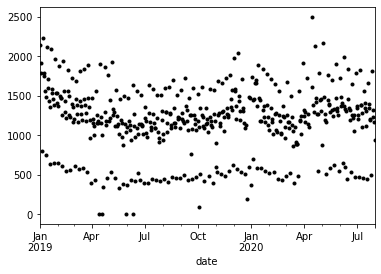

In [14]:
series.plot(style='k.')
pyplot.show()

### Histogram and Density Plots

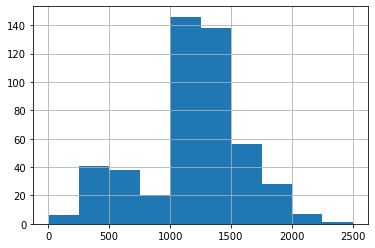

In [15]:
series.hist()
pyplot.show()

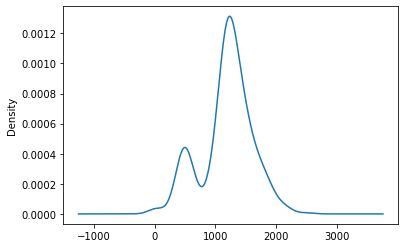

In [16]:
series.plot(kind='kde')
pyplot.show()

### Lag plots

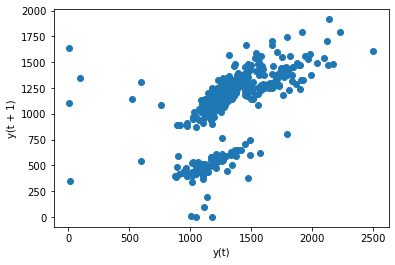

In [17]:
from pandas.plotting import lag_plot
lag_plot(series)
pyplot.show()

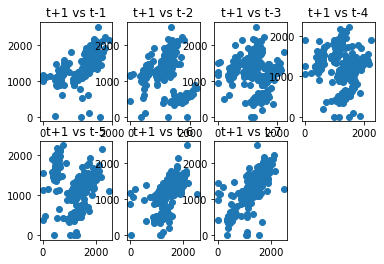

In [18]:
# create multiple scatter plots
from pandas import concat
values = DataFrame(series.values)
lags = 7
columns = [values]
for i in range(1,(lags + 1)):
	columns.append(values.shift(i))
dataframe = concat(columns, axis=1)
columns = ['t+1']
for i in range(1,(lags + 1)):
	columns.append('t-' + str(i))
dataframe.columns = columns
pyplot.figure(1)
for i in range(1,(lags + 1)):
	ax = pyplot.subplot(240 + i)
	ax.set_title('t+1 vs t-' + str(i))
	pyplot.scatter(x=dataframe['t+1'].values, y=dataframe['t-'+str(i)].values)
pyplot.show()

### Upsampling

In [25]:
# upsample to daily intervals
from pandas import datetime
series = read_csv('TP_month.csv', header=0, parse_dates=[0], index_col=0, squeeze=True) #, date_parser=parser)
upsampled = series.resample('D').mean()
print(upsampled.head(32))

date
2019-05-01    30622.0
2019-05-02        NaN
2019-05-03        NaN
2019-05-04        NaN
2019-05-05        NaN
2019-05-06        NaN
2019-05-07        NaN
2019-05-08        NaN
2019-05-09        NaN
2019-05-10        NaN
2019-05-11        NaN
2019-05-12        NaN
2019-05-13        NaN
2019-05-14        NaN
2019-05-15        NaN
2019-05-16        NaN
2019-05-17        NaN
2019-05-18        NaN
2019-05-19        NaN
2019-05-20        NaN
2019-05-21        NaN
2019-05-22        NaN
2019-05-23        NaN
2019-05-24        NaN
2019-05-25        NaN
2019-05-26        NaN
2019-05-27        NaN
2019-05-28        NaN
2019-05-29        NaN
2019-05-30        NaN
2019-05-31        NaN
2019-06-01    31449.0
Freq: D, Name: volume, dtype: float64


date
2019-05-01    30622.000000
2019-05-02    30648.677419
2019-05-03    30675.354839
2019-05-04    30702.032258
2019-05-05    30728.709677
2019-05-06    30755.387097
2019-05-07    30782.064516
2019-05-08    30808.741935
2019-05-09    30835.419355
2019-05-10    30862.096774
2019-05-11    30888.774194
2019-05-12    30915.451613
2019-05-13    30942.129032
2019-05-14    30968.806452
2019-05-15    30995.483871
2019-05-16    31022.161290
2019-05-17    31048.838710
2019-05-18    31075.516129
2019-05-19    31102.193548
2019-05-20    31128.870968
2019-05-21    31155.548387
2019-05-22    31182.225806
2019-05-23    31208.903226
2019-05-24    31235.580645
2019-05-25    31262.258065
2019-05-26    31288.935484
2019-05-27    31315.612903
2019-05-28    31342.290323
2019-05-29    31368.967742
2019-05-30    31395.645161
2019-05-31    31422.322581
2019-06-01    31449.000000
Freq: D, Name: volume, dtype: float64


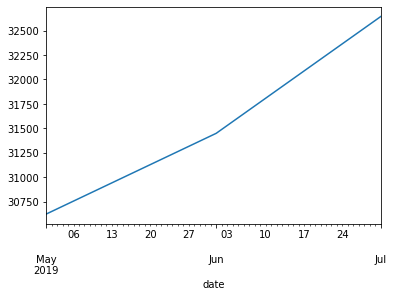

C:\Users\Kyrie\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  """


In [26]:
interpolated = upsampled.interpolate(method='linear')
print(interpolated.head(32))
interpolated.plot()
pyplot.show()
interpolated.to_csv('month_days.csv')

In [21]:
series = read_csv('TP_week.csv', header=0, parse_dates=[0], index_col=0, squeeze=True) #, date_parser=parser)
upsampled = series.resample('D').mean()
print(upsampled.head(32))

date
2019-04-29     874.0
2019-04-30       NaN
2019-05-01       NaN
2019-05-02       NaN
2019-05-03       NaN
2019-05-04       NaN
2019-05-05       NaN
2019-05-06    7819.0
2019-05-07       NaN
2019-05-08       NaN
2019-05-09       NaN
2019-05-10       NaN
2019-05-11       NaN
2019-05-12       NaN
2019-05-13    7871.0
2019-05-14       NaN
2019-05-15       NaN
2019-05-16       NaN
2019-05-17       NaN
2019-05-18       NaN
2019-05-19       NaN
2019-05-20    6226.0
2019-05-21       NaN
2019-05-22       NaN
2019-05-23       NaN
2019-05-24       NaN
2019-05-25       NaN
2019-05-26       NaN
2019-05-27    7832.0
2019-05-28       NaN
2019-05-29       NaN
2019-05-30       NaN
Freq: D, Name: volume, dtype: float64


date
2019-04-29     874.000000
2019-04-30    1866.142857
2019-05-01    2858.285714
2019-05-02    3850.428571
2019-05-03    4842.571429
2019-05-04    5834.714286
2019-05-05    6826.857143
2019-05-06    7819.000000
2019-05-07    7826.428571
2019-05-08    7833.857143
2019-05-09    7841.285714
2019-05-10    7848.714286
2019-05-11    7856.142857
2019-05-12    7863.571429
2019-05-13    7871.000000
2019-05-14    7636.000000
2019-05-15    7401.000000
2019-05-16    7166.000000
2019-05-17    6931.000000
2019-05-18    6696.000000
2019-05-19    6461.000000
2019-05-20    6226.000000
2019-05-21    6455.428571
2019-05-22    6684.857143
2019-05-23    6914.285714
2019-05-24    7143.714286
2019-05-25    7373.142857
2019-05-26    7602.571429
2019-05-27    7832.000000
2019-05-28    7662.142857
2019-05-29    7492.285714
2019-05-30    7322.428571
Freq: D, Name: volume, dtype: float64


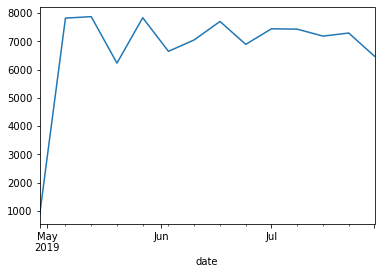

In [22]:
interpolated = upsampled.interpolate(method='linear')
print(interpolated.head(32))
interpolated.plot()
pyplot.show()

date
2019-04-29     874.000000
2019-04-30    2331.888457
2019-05-01    3634.445528
2019-05-02    4781.781010
2019-05-03    5773.894903
2019-05-04    6610.787206
2019-05-05    7292.457921
2019-05-06    7819.000000
2019-05-07    8190.134583
2019-05-08    8406.140531
2019-05-09    8466.924889
2019-05-10    8387.026599
2019-05-11    8253.679301
2019-05-12    8081.421936
2019-05-13    7871.000000
2019-05-14    7620.177004
2019-05-15    7331.189438
2019-05-16    7003.291804
2019-05-17    6655.369511
2019-05-18    6400.735004
2019-05-19    6258.273690
2019-05-20    6226.000000
2019-05-21    6309.870641
2019-05-22    6503.928906
2019-05-23    6810.160365
2019-05-24    7201.480834
2019-05-25    7515.385217
2019-05-26    7724.789332
2019-05-27    7832.000000
2019-05-28    7830.096755
2019-05-29    7726.000064
2019-05-30    7517.403104
Freq: D, Name: volume, dtype: float64


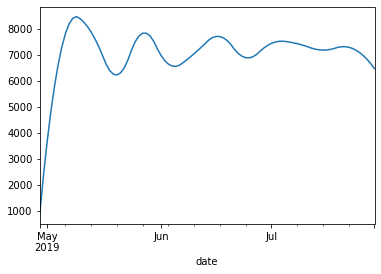

In [23]:
upsampled = series.resample('D').mean()
interpolated = upsampled.interpolate(method='spline', order=2)
print(interpolated.head(32))
interpolated.plot()
pyplot.show()


date
2019-04-29 00:00:00    874.0
2019-04-29 01:00:00      NaN
2019-04-29 02:00:00      NaN
2019-04-29 03:00:00      NaN
2019-04-29 04:00:00      NaN
2019-04-29 05:00:00      NaN
2019-04-29 06:00:00      NaN
2019-04-29 07:00:00      NaN
2019-04-29 08:00:00      NaN
2019-04-29 09:00:00      NaN
2019-04-29 10:00:00      NaN
2019-04-29 11:00:00      NaN
2019-04-29 12:00:00      NaN
2019-04-29 13:00:00      NaN
2019-04-29 14:00:00      NaN
2019-04-29 15:00:00      NaN
2019-04-29 16:00:00      NaN
2019-04-29 17:00:00      NaN
2019-04-29 18:00:00      NaN
2019-04-29 19:00:00      NaN
2019-04-29 20:00:00      NaN
2019-04-29 21:00:00      NaN
2019-04-29 22:00:00      NaN
2019-04-29 23:00:00      NaN
2019-04-30 00:00:00      NaN
2019-04-30 01:00:00      NaN
2019-04-30 02:00:00      NaN
2019-04-30 03:00:00      NaN
2019-04-30 04:00:00      NaN
2019-04-30 05:00:00      NaN
2019-04-30 06:00:00      NaN
2019-04-30 07:00:00      NaN
Freq: H, Name: volume, dtype: float64
date
2019-04-29 00:00:00     

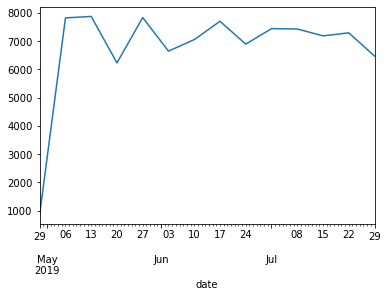

In [24]:
series = read_csv('TP_week.csv', header=0, parse_dates=[0], index_col=0, squeeze=True) #, date_parser=parser)
upsampled = series.resample('H').mean()
print(upsampled.head(32))

interpolated = upsampled.interpolate(method='linear')
print(interpolated.head(32))
interpolated.plot()
pyplot.show()

### Downsampling

date
2019-03-31    1369.013158
2019-06-30    1041.921053
2019-09-30    1112.316456
2019-12-31    1145.948052
2020-03-31    1170.986842
Freq: Q-DEC, Name: volume, dtype: float64


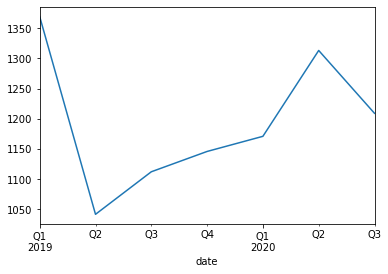

In [26]:
series = read_csv('TP.csv', header=0, index_col=0, parse_dates=True, squeeze=True)
resample = series.resample('Q')
quarterly_mean_sales = resample.mean()
print(quarterly_mean_sales.head())
quarterly_mean_sales.plot()
pyplot.show()

date
2019-01-31    1547.807692
2019-02-28    1325.458333
2019-03-31    1230.423077
2019-04-30    1088.280000
2019-05-31    1072.384615
Freq: M, Name: volume, dtype: float64


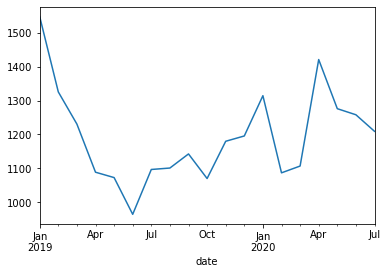

In [27]:
resample = series.resample('M')
quarterly_mean_sales = resample.mean()
print(quarterly_mean_sales.head())
quarterly_mean_sales.plot()
pyplot.show()

date
2019-12-31    1166.694805
2020-12-31    1234.410405
Freq: A-DEC, Name: volume, dtype: float64


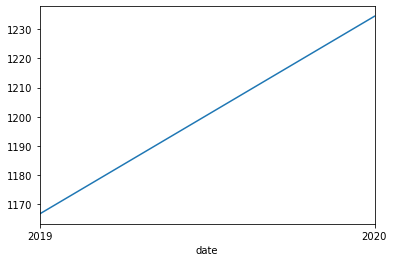

In [28]:
resample = series.resample('Y')
quarterly_mean_sales = resample.mean()
print(quarterly_mean_sales.head())
quarterly_mean_sales.plot()
pyplot.show()

## Box-Cox Transform

* lambda = -1.0 is a reciprocal transform.
* lambda = -0.5 is a reciprocal square root transform.
* lambda = 0.0 is a log transform.
* lambda = 0.5 is a square root transform.
* lambda = 1.0 is no transform.

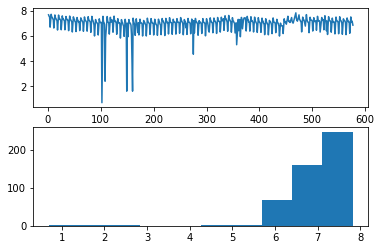

In [29]:
# manually box-cox transform a time series
from scipy.stats import boxcox
series = read_csv('TP.csv', header=0, index_col=0, parse_dates=True, squeeze=True)
dataframe = DataFrame(series.values).dropna()
dataframe.columns = ['volume']
dataframe['volume'] = boxcox(dataframe['volume'], lmbda=0.0)
pyplot.figure(1)
# line plot
pyplot.subplot(211)
pyplot.plot(dataframe['volume'])
# histogram
pyplot.subplot(212)
pyplot.hist(dataframe['volume'])
pyplot.show()

Lambda: 1.172239


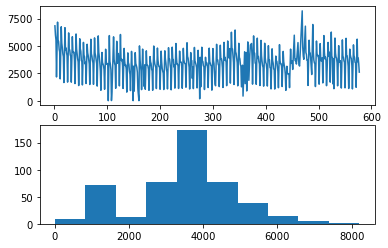

In [30]:
series = read_csv('TP.csv', header=0, index_col=0, parse_dates=True, squeeze=True)
dataframe = DataFrame(series.values).dropna()
dataframe.columns = ['volume']
dataframe['volume'], lam = boxcox(dataframe['volume'])
print('Lambda: %f' % lam)
pyplot.figure(1)
# line plot
pyplot.subplot(211)
pyplot.plot(dataframe['volume'])
# histogram
pyplot.subplot(212)
pyplot.hist(dataframe['volume'])
pyplot.show()

## Moving Average Smoothing

date
2019-01-04    1949.333333
2019-01-05    1504.000000
2019-01-09    1923.000000
2019-01-10    1698.000000
2019-01-11    1596.666667
2019-01-12    1263.333333
2019-01-16    1807.000000
2019-01-17    1580.666667
2019-01-18    1464.333333
2019-01-19    1146.000000
Name: volume, dtype: float64


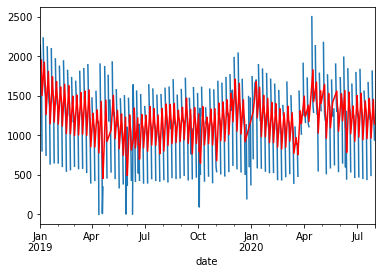

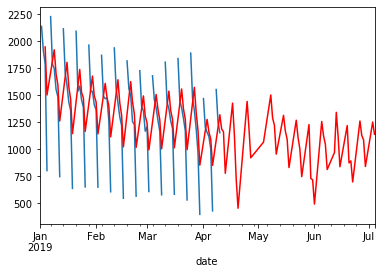

In [31]:
# moving average smoothing as data preparation
# tail-rolling average transform
rolling = series.rolling(window=3)
rolling_mean = rolling.mean().dropna()
print(rolling_mean.head(10))
# plot original and transformed dataset
series.plot()
rolling_mean.plot(color='red')
pyplot.show()
# zoomed plot original and transformed dataset
series[:100].plot()
rolling_mean[:100].plot(color='red')
pyplot.show()

### Moving Average as Feature Engineering

In [32]:
# moving average smoothing as feature engineering
df = DataFrame(series.values)
width = 3
lag1 = df.shift(1)
lag3 = df.shift(width - 1)
window = lag3.rolling(window=width)
means = window.mean()
dataframe = concat([means, lag1, df], axis=1)
dataframe.columns = ['mean', 't', 't+1']
print(dataframe.head(10))

          mean       t     t+1
0          NaN     NaN     NaN
1          NaN     NaN  2140.0
2          NaN  2140.0  1916.0
3          NaN  1916.0  1792.0
4          NaN  1792.0   804.0
5  1949.333333   804.0     NaN
6  1504.000000     NaN  2230.0
7          NaN  2230.0  1791.0
8          NaN  1791.0  1748.0
9          NaN  1748.0  1555.0


### Moving Average as Prediction

predicted=1949.333333, expected=804.000000
predicted=1504.000000, expected=2230.000000
predicted=1608.666667, expected=1791.000000
predicted=1608.333333, expected=1748.000000
predicted=1923.000000, expected=1555.000000
predicted=1698.000000, expected=1487.000000
predicted=1596.666667, expected=748.000000
predicted=1263.333333, expected=2117.000000
predicted=1450.666667, expected=1710.000000
predicted=1525.000000, expected=1594.000000
predicted=1807.000000, expected=1438.000000
predicted=1580.666667, expected=1361.000000
predicted=1464.333333, expected=639.000000
predicted=1146.000000, expected=2095.000000
predicted=1365.000000, expected=1539.000000
predicted=1424.333333, expected=1587.000000
predicted=1740.333333, expected=1459.000000
predicted=1528.333333, expected=1389.000000
predicted=1478.333333, expected=653.000000
predicted=1167.000000, expected=1966.000000
predicted=1336.000000, expected=1534.000000
predicted=1384.333333, expected=1539.000000
predicted=1679.666667, expected=1412

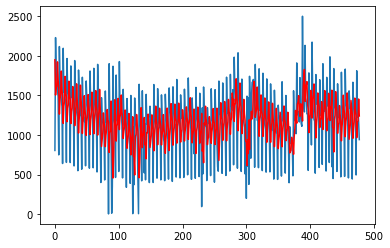

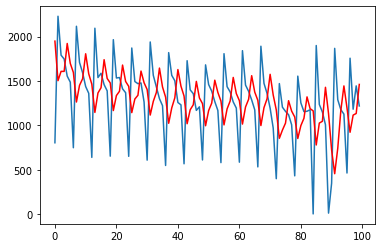

In [33]:
# moving average smoothing as a forecast model
from math import sqrt
from pandas import Series
from numpy import mean
from sklearn.metrics import mean_squared_error
from matplotlib import pyplot
series = read_csv('TP.csv', header=0, index_col=0, parse_dates=True, squeeze=True).dropna()
# prepare situation
X = series.values
window = 3
history = [X[i] for i in range(window)]
test = [X[i] for i in range(window, len(X))]
predictions = list()
# walk forward over time steps in test
for t in range(len(test)):
	length = len(history)
	yhat = mean([history[i] for i in range(length-window,length)])
	obs = test[t]
	predictions.append(yhat)
	history.append(obs)
	print('predicted=%f, expected=%f' % (yhat, obs))
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)
# plot
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()
# zoom plot
pyplot.plot(test[:100])
pyplot.plot(predictions[:100], color='red')
pyplot.show()

## Noise

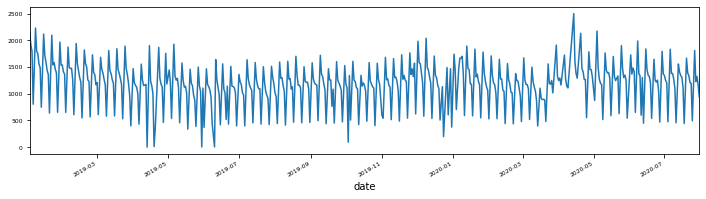

In [34]:
series.plot(figsize=(12, 3), fontsize=6)
pyplot.show()

In [35]:
import statsmodels.api as sm
import pandas as pd
# Perform time series decompositon
series = pd.read_csv('TP.csv')
series['date'] = pd.to_datetime(series['date'])
series = series.set_index('date')
series=series.dropna()
series = series.resample('D').interpolate()

decomposition = sm.tsa.seasonal_decompose(series)

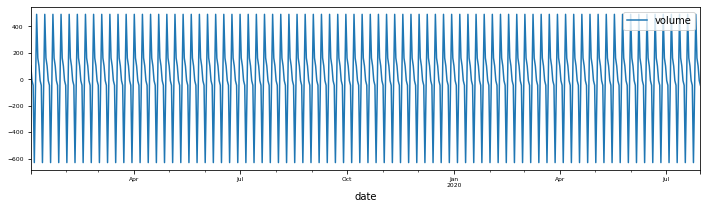

In [36]:
seasonal = decomposition.seasonal
seasonal.plot(figsize=(12, 3), fontsize=6)
pyplot.show()

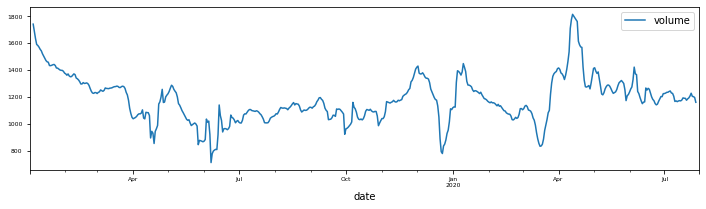

In [37]:
# Extract the trend component
trend = decomposition.trend
# Plot the values of the trend
trend.plot(figsize=(12, 3), fontsize=6)
pyplot.show()

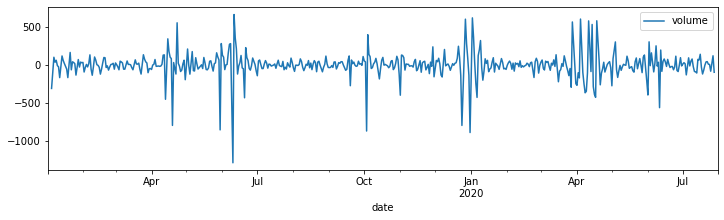

In [38]:
# Extract the noise component
resid = decomposition.resid
resid.plot(figsize=(12, 3))
pyplot.show()

## Detrending

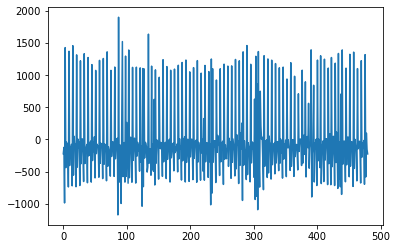

In [39]:
# detrend a time series using differencing

series = read_csv('TP.csv', header=0, parse_dates=[0], index_col=0, squeeze=True).dropna()
X = series.values
diff = list()
for i in range(1, len(X)):
	value = X[i] - X[i - 1]
	diff.append(value)
pyplot.plot(diff)
pyplot.show()

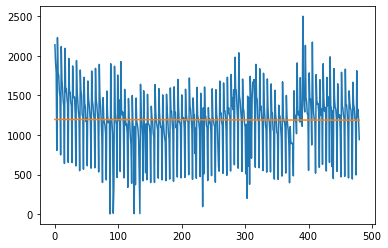

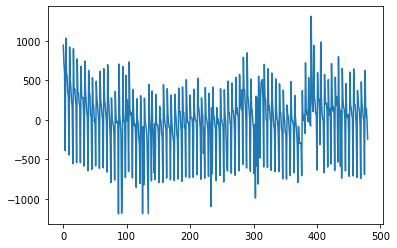

In [40]:
# use a linear model to detrend a time series
from sklearn.linear_model import LinearRegression
import numpy as np

#series = read_csv('shampoo-sales.csv', header=0, parse_dates=[0], index_col=0, squeeze=True, date_parser=parser)
# fit linear model
X = [i for i in range(0, len(series))]
X = np.reshape(X, (len(X), 1))
y = series.values
model = LinearRegression()
model.fit(X, y)
# calculate trend
trend = model.predict(X)
# plot trend
pyplot.plot(y)
pyplot.plot(trend)
pyplot.show()
# detrend
detrended = [y[i]-trend[i] for i in range(0, len(series))]
# plot detrended
pyplot.plot(detrended)
pyplot.show()

## Deseasonalize

### Differencing

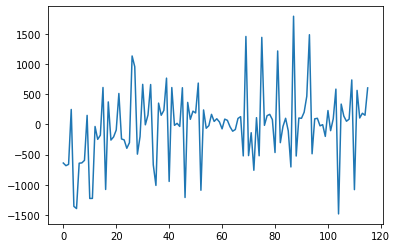

In [41]:
# deseasonalize a time series using differencing

X = series.values
diff = list()
days_in_year = 365
for i in range(days_in_year, len(X)):
 value = X[i] - X[i - days_in_year]
 diff.append(value)
pyplot.plot(diff)
pyplot.show()

Coefficients: [-5.24488451e-07  3.30079560e-04 -5.40394737e-02  1.98835754e-01
  1.38089789e+03]


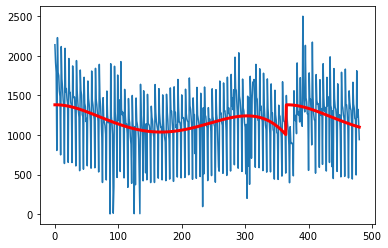

In [97]:
# model seasonality with a polynomial model
from numpy import polyfit
# fit polynomial: x^2*b1 + x*b2 + ... + bn
X = [i%365 for i in range(0, len(series))]
y = series.values
degree = 4
coef = polyfit(X, y, degree)
print('Coefficients: %s' % coef)
# create curve
curve = list()
for i in range(len(X)):
	value = coef[-1]
	for d in range(degree):
		value += X[i]**(degree-d) * coef[d]
	curve.append(value)
# plot curve over original data
pyplot.plot(series.values)
pyplot.plot(curve, color='red', linewidth=3)
pyplot.show()

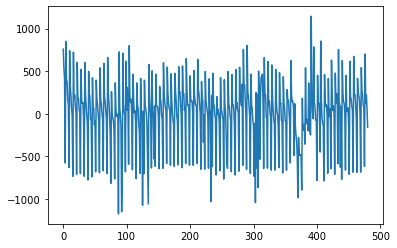

In [43]:
# deseasonalize by differencing with a polynomial model
from numpy import polyfit
# fit polynomial: x^2*b1 + x*b2 + ... + bn
X = [i%365 for i in range(0, len(series))]
y = series.values
degree = 4
coef = polyfit(X, y, degree)
# create curve
curve = list()
for i in range(len(X)):
	value = coef[-1]
	for d in range(degree):
		value += X[i]**(degree-d) * coef[d]
	curve.append(value)
# create seasonally adjusted
values = series.values
diff = list()
for i in range(len(values)):
	value = values[i] - curve[i]
	diff.append(value)
pyplot.plot(diff)
pyplot.show()

### Check for stationarity

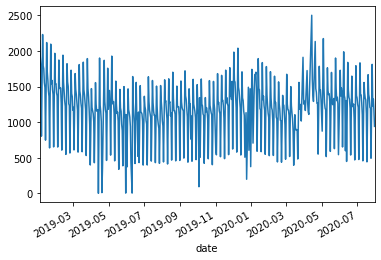

In [44]:
series.plot()
pyplot.show()

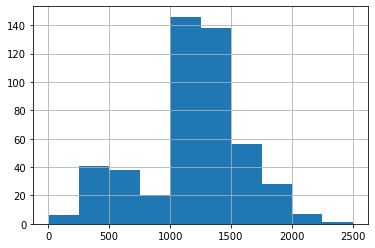

In [45]:
series.hist()
pyplot.show()

In [46]:
X = series.values
split = int(len(X) / 2)
X1, X2 = X[0:split], X[split:]
mean1, mean2 = X1.mean(), X2.mean()
var1, var2 = X1.var(), X2.var()
print('mean1=%f, mean2=%f' % (mean1, mean2))
print('variance1=%f, variance2=%f' % (var1, var2))

mean1=1168.929167, mean2=1213.078838
variance1=187158.582483, variance2=159486.678432


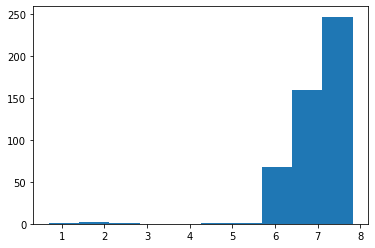

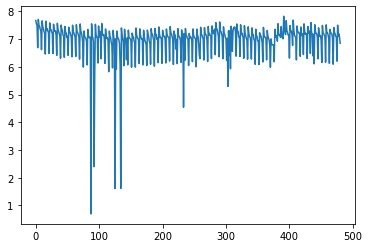

In [47]:
from numpy import log
X = series.values
X = log(X)
pyplot.hist(X)
pyplot.show()
pyplot.plot(X)
pyplot.show()

In [48]:
split = int(len(X) / 2)
X1, X2 = X[0:split], X[split:]
mean1, mean2 = X1.mean(), X2.mean()
var1, var2 = X1.var(), X2.var()
print('mean1=%f, mean2=%f' % (mean1, mean2))
print('variance1=%f, variance2=%f' % (var1, var2))

mean1=6.908509, mean2=7.029763
variance1=0.686938, variance2=0.168583


## Dickey-Fuller test

In [49]:
# calculate stationarity test of time series data
from statsmodels.tsa.stattools import adfuller
X = series.values
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
 print('\t%s: %.3f' % (key, value))

ADF Statistic: -3.422054
p-value: 0.010230
Critical Values:
	1%: -3.445
	5%: -2.868
	10%: -2.570


In [50]:
# calculate stationarity test of log transformed time series data

X = series.values
X = log(X)
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
for key, value in result[4].items():
 print('\t%s: %.3f' % (key, value))

ADF Statistic: -4.587689
p-value: 0.000136
	1%: -3.444
	5%: -2.868
	10%: -2.570


## Evaluate Model

In [51]:
# calculate a train-test split of a time series dataset

X = series.values
train_size = int(len(X) * 0.66)
train, test = X[0:train_size], X[train_size:len(X)]
print('Observations: %d' % (len(X)))
print('Training Observations: %d' % (len(train)))
print('Testing Observations: %d' % (len(test)))

Observations: 481
Training Observations: 317
Testing Observations: 164


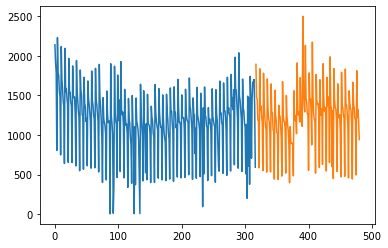

In [52]:
pyplot.plot(train)
pyplot.plot([None for i in train] + [x for x in test])
pyplot.show()

### Multiple Train-Test Splits

Observations: 241
Training Observations: 121
Testing Observations: 120
Observations: 361
Training Observations: 241
Testing Observations: 120
Observations: 481
Training Observations: 361
Testing Observations: 120


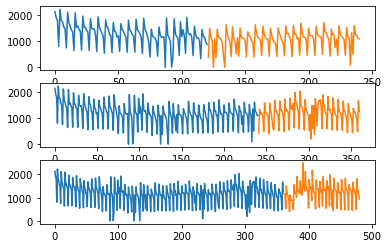

In [53]:
# calculate repeated train-test splits of time series data
from sklearn.model_selection import TimeSeriesSplit
X = series.values
splits = TimeSeriesSplit(n_splits=3)
pyplot.figure(1)
index = 1
for train_index, test_index in splits.split(X):
	train = X[train_index]
	test = X[test_index]
	print('Observations: %d' % (len(train) + len(test)))
	print('Training Observations: %d' % (len(train)))
	print('Testing Observations: %d' % (len(test)))
	pyplot.subplot(310 + index)
	pyplot.plot(train)
	pyplot.plot([None for i in train] + [x for x in test])
	index += 1
pyplot.show()

### Walk Forward Validation

In [54]:
# walk forward evaluation model for time series data
X = series.values
n_train = 500
n_records = len(X)
for i in range(n_train, n_records):
 train, test = X[0:i], X[i:i+1]
 print('train=%d, test=%d' % (len(train), len(test)))

## Forecasting Performance Measures

### Persistence Algorithm Steps

 1. Transform the univariate dataset into a supervised learning problem.
 2. Establish the train and test datasets for the test harness.
 3. Define the persistence model.
 4. Make a forecast and establish a baseline performance.
 5. Review the complete example and plot the output.

### Step 1: Define the Supervised Learning Problem

In [55]:
# Create lagged dataset
values = DataFrame(series.values)
dataframe = concat([values.shift(1), values], axis=1)
dataframe.columns = ['t', 't+1']
print(dataframe.head(5))

        t     t+1
0     NaN  2140.0
1  2140.0  1916.0
2  1916.0  1792.0
3  1792.0   804.0
4   804.0  2230.0


### Step 2: Train and Test Sets

In [56]:
# split into train and test sets
X = dataframe.values
train_size = int(len(X) * 0.66)
train, test = X[1:train_size], X[train_size:]
train_X, train_y = train[:,0], train[:,1]
test_X, test_y = test[:,0], test[:,1]

### Step 3: Persistence Algorithm

In [57]:
# persistence model
def model_persistence(x):
 return x

### Step 4: Make and Evaluate Forecast

In [58]:
# walk-forward validation
predictions = list()
for x in test_X:
 yhat = model_persistence(x)
 predictions.append(yhat)
rmse = sqrt(mean_squared_error(test_y, predictions))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 587.759


### Step 5: Complete Example

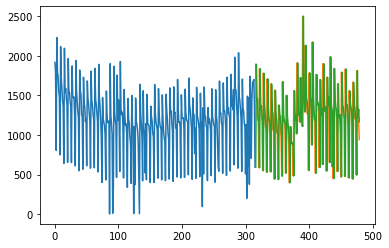

In [59]:
# plot predictions and expected results
pyplot.plot(train_y)
pyplot.plot([None for i in train_y] + [x for x in test_y])
pyplot.plot([None for i in train_y] + [x for x in predictions])
pyplot.show()

## Residual Forecast Errors

In [60]:
# calculate residuals from a persistence forecast

# create lagged dataset
values = DataFrame(series.values)
dataframe = concat([values.shift(1), values], axis=1)
dataframe.columns = ['t', 't+1']
# split into train and test sets
X = dataframe.values
train_size = int(len(X) * 0.66)
train, test = X[1:train_size], X[train_size:]
train_X, train_y = train[:,0], train[:,1]
test_X, test_y = test[:,0], test[:,1]
# persistence model
predictions = [x for x in test_X]
# calculate residuals
residuals = [test_y[i]-predictions[i] for i in range(len(predictions))]
residuals = DataFrame(residuals)
print(residuals.head())

        0
0  1300.0
1  -419.0
2   -21.0
3  -265.0
4    -9.0


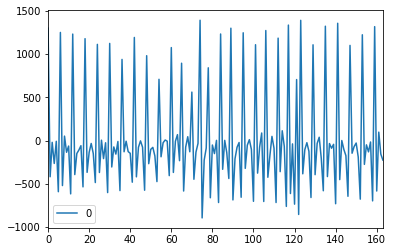

In [61]:
residuals.plot()
pyplot.show()

In [62]:
print(residuals.describe())

                 0
count   164.000000
mean      2.128049
std     589.555746
min    -895.000000
25%    -379.000000
50%    -103.500000
75%       2.500000
max    1391.000000


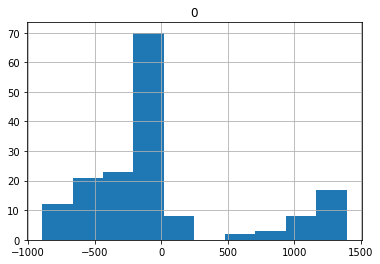

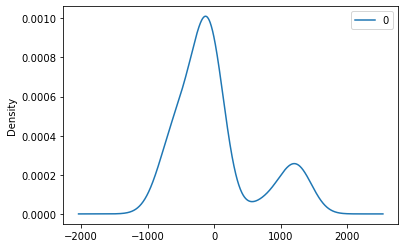

In [63]:
# histogram plot
residuals.hist()
pyplot.show()
# density plot
residuals.plot(kind='kde')
pyplot.show()

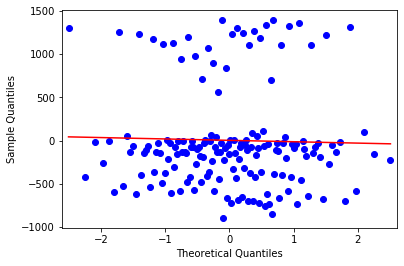

In [64]:
from statsmodels.graphics.gofplots import qqplot
qqplot(residuals, line='r')
pyplot.show()

In [65]:
from pandas.plotting import autocorrelation_plot

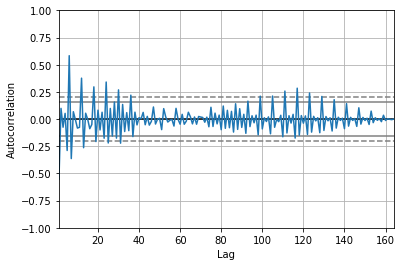

In [66]:
autocorrelation_plot(residuals)
pyplot.show()

## Forecast Models

### Autocorrelation

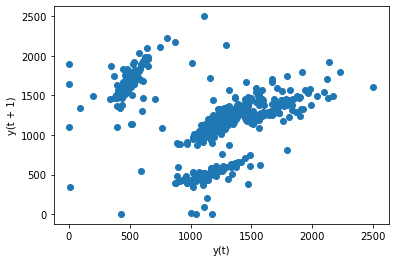

In [67]:
lag_plot(series)
pyplot.show()

In [68]:
values = DataFrame(series.values)
dataframe = concat([values.shift(1), values], axis=1)
dataframe.columns = ['t', 't+1']
result = dataframe.corr()
print(result)

            t       t+1
t    1.000000 -0.081438
t+1 -0.081438  1.000000


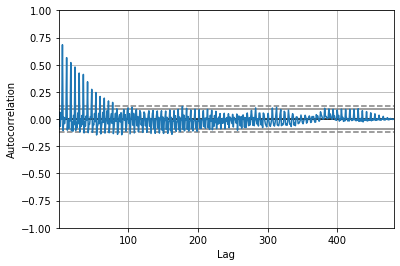

In [69]:
autocorrelation_plot(series)
pyplot.show()

In [70]:
from statsmodels.graphics.tsaplots import plot_acf

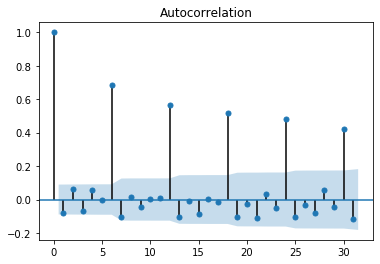

In [71]:
plot_acf(series, lags=31)
pyplot.show()

Test RMSE: 615.069


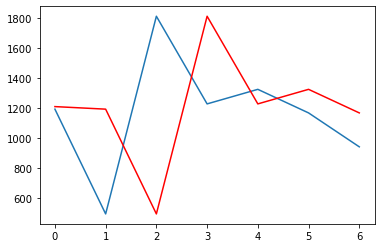

In [72]:
# create lagged dataset
values = DataFrame(series.values)
dataframe = concat([values.shift(1), values], axis=1)
dataframe.columns = ['t', 't+1']
# split into train and test sets
X = dataframe.values
train, test = X[1:len(X)-7], X[len(X)-7:]
train_X, train_y = train[:,0], train[:,1]
test_X, test_y = test[:,0], test[:,1]
# persistence model
def model_persistence(x):
 return x
# walk-forward validation
predictions = list()
for x in test_X:
 yhat = model_persistence(x)
 predictions.append(yhat)
rmse = sqrt(mean_squared_error(test_y, predictions))
print('Test RMSE: %.3f' % rmse)
# plot predictions vs expected
pyplot.plot(test_y)
pyplot.plot(predictions, color='red')
pyplot.show()

Lag: 18
Coefficients: [ 4.20773120e+02 -8.71051067e-02  9.03588274e-02 -2.06316284e-02
  5.49130638e-02  1.07514550e-01  4.97650382e-01 -6.69278170e-02
 -5.13618136e-02  8.29675449e-02 -7.74335172e-02  1.38330597e-02
  1.51868781e-01  5.39680077e-02 -6.79588126e-02 -9.66097219e-02
 -1.17956013e-02 -8.45560084e-02  1.50957968e-01]
predicted=1080.540892, expected=1192.000000
predicted=574.772767, expected=494.000000
predicted=1639.254670, expected=1811.000000
predicted=1322.807914, expected=1227.000000
predicted=1304.454949, expected=1324.000000
predicted=1219.978424, expected=1167.000000
predicted=1060.397038, expected=941.000000
Test RMSE: 103.556


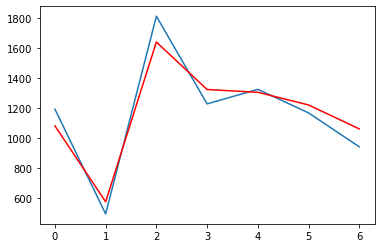

In [73]:
from statsmodels.tsa.ar_model import AR
# split dataset
X = series.values
train, test = X[1:len(X)-7], X[len(X)-7:]
# train autoregression
model = AR(train)
model_fit = model.fit()
print('Lag: %s' % model_fit.k_ar)
print('Coefficients: %s' % model_fit.params)
# make predictions
predictions = model_fit.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False)
for i in range(len(predictions)):
 print('predicted=%f, expected=%f' % (predictions[i], test[i]))
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)
# plot results
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()

predicted=1080.540892, expected=1192.000000
predicted=565.064109, expected=494.000000
predicted=1656.361705, expected=1811.000000
predicted=1298.249904, expected=1227.000000
predicted=1336.106049, expected=1324.000000
predicted=1213.623470, expected=1167.000000
predicted=1124.968952, expected=941.000000
Test RMSE: 108.646


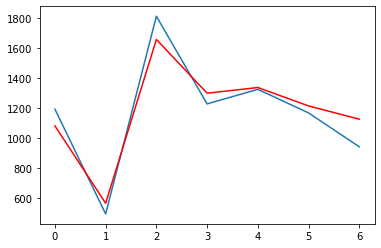

In [74]:
# split dataset
X = series.values
train, test = X[1:len(X)-7], X[len(X)-7:]
# train autoregression
model = AR(train)
model_fit = model.fit()
window = model_fit.k_ar
coef = model_fit.params
# walk forward over time steps in test
history = train[len(train)-window:]
history = [history[i] for i in range(len(history))]
predictions = list()
for t in range(len(test)):
 length = len(history)
 lag = [history[i] for i in range(length-window,length)]
 yhat = coef[0]
 for d in range(window):
  yhat += coef[d+1] * lag[window-d-1]
 obs = test[t]
 predictions.append(yhat)
 history.append(obs)
 print('predicted=%f, expected=%f' % (yhat, obs))
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)
# plot
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()

## Moving Average Models for Forecasting

In [75]:
# create lagged dataset
values = DataFrame(series.values)
dataframe = concat([values.shift(1), values], axis=1)
dataframe.columns = ['t', 't+1']
# split into train and test sets
X = dataframe.values
train_size = int(len(X) * 0.66)
train, test = X[1:train_size], X[train_size:]
train_X, train_y = train[:,0], train[:,1]
test_X, test_y = test[:,0], test[:,1]
# persistence model
predictions = [x for x in test_X]
# skill of persistence model
rmse = sqrt(mean_squared_error(test_y, predictions))
print('Test RMSE: %.3f' % rmse)
# calculate residuals
residuals = [test_y[i]-predictions[i] for i in range(len(predictions))]
residuals = DataFrame(residuals)
print(residuals.head())

Test RMSE: 587.759
        0
0  1300.0
1  -419.0
2   -21.0
3  -265.0
4    -9.0


In [76]:
# create lagged dataset
values = DataFrame(series.values)
dataframe = concat([values.shift(1), values], axis=1)
dataframe.columns = ['t', 't+1']
# split into train and test sets
X = dataframe.values
train_size = int(len(X) * 0.66)
train, test = X[1:train_size], X[train_size:]
train_X, train_y = train[:,0], train[:,1]
test_X, test_y = test[:,0], test[:,1]
# persistence model on training set
train_pred = [x for x in train_X]
# calculate residuals
train_resid = [train_y[i]-train_pred[i] for i in range(len(train_pred))]
# model the training set residuals
model = AR(train_resid)
model_fit = model.fit()
window = model_fit.k_ar
coef = model_fit.params
print('Lag=%d, Coef=%s' % (window, coef))

Lag=16, Coef=[-2.70660942 -1.00916098 -0.81900541 -0.86701027 -0.9221405  -0.66103121
 -0.08867873 -0.21325812 -0.2864055  -0.02936767 -0.14006497 -0.30426428
 -0.01219089  0.10918873  0.02589634 -0.15391894  0.0529577 ]


predicted error=910.266543, expected error=1300.000000
predicted error=-135.491865, expected error=-419.000000
predicted error=-462.928881, expected error=-21.000000
predicted error=369.932715, expected error=-265.000000
predicted error=43.942655, expected error=-9.000000
predicted error=-133.096286, expected error=-592.000000
predicted error=842.056723, expected error=1250.000000
predicted error=-347.389027, expected error=-521.000000
predicted error=114.354798, expected error=51.000000
predicted error=10.262759, expected error=-136.000000
predicted error=-70.675227, expected error=-64.000000
predicted error=-436.949785, expected error=-617.000000
predicted error=1128.949999, expected error=1231.000000
predicted error=-420.583722, expected error=-394.000000
predicted error=9.642617, expected error=-150.000000
predicted error=-36.739114, expected error=-110.000000
predicted error=-10.161155, expected error=-60.000000
predicted error=-393.545883, expected error=-536.000000
predicted err

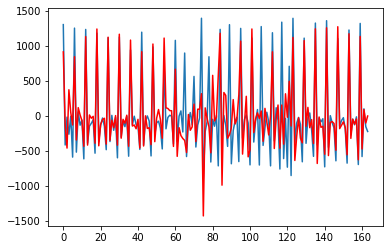

In [77]:
# forecast residual forecast error

# create lagged dataset
values = DataFrame(series.values)
dataframe = concat([values.shift(1), values], axis=1)
dataframe.columns = ['t', 't+1']
# split into train and test sets
X = dataframe.values
train_size = int(len(X) * 0.66)
train, test = X[1:train_size], X[train_size:]
train_X, train_y = train[:,0], train[:,1]
test_X, test_y = test[:,0], test[:,1]
# persistence model on training set
train_pred = [x for x in train_X]
# calculate residuals
train_resid = [train_y[i]-train_pred[i] for i in range(len(train_pred))]
# model the training set residuals
model = AR(train_resid)
model_fit = model.fit()
window = model_fit.k_ar
coef = model_fit.params
# walk forward over time steps in test
history = train_resid[len(train_resid)-window:]
history = [history[i] for i in range(len(history))]
predictions = list()
expected_error = list()
for t in range(len(test_y)):
	# persistence
	yhat = test_X[t]
	error = test_y[t] - yhat
	expected_error.append(error)
	# predict error
	length = len(history)
	lag = [history[i] for i in range(length-window,length)]
	pred_error = coef[0]
	for d in range(window):
		pred_error += coef[d+1] * lag[window-d-1]
	predictions.append(pred_error)
	history.append(error)
	print('predicted error=%f, expected error=%f' % (pred_error, error))
# plot predicted error
pyplot.plot(expected_error)
pyplot.plot(predictions, color='red')
pyplot.show()

### Correct Predictions with a Model of Residuals

predicted=1502.266543, expected=1892.000000
predicted=1756.508135, expected=1473.000000
predicted=1010.071119, expected=1452.000000
predicted=1821.932715, expected=1187.000000
predicted=1230.942655, expected=1178.000000
predicted=1044.903714, expected=586.000000
predicted=1428.056723, expected=1836.000000
predicted=1488.610973, expected=1315.000000
predicted=1429.354798, expected=1366.000000
predicted=1376.262759, expected=1230.000000
predicted=1159.324773, expected=1166.000000
predicted=729.050215, expected=549.000000
predicted=1677.949999, expected=1780.000000
predicted=1359.416278, expected=1386.000000
predicted=1395.642617, expected=1236.000000
predicted=1199.260886, expected=1126.000000
predicted=1115.838845, expected=1066.000000
predicted=672.454117, expected=530.000000
predicted=1767.166580, expected=1708.000000
predicted=1277.499372, expected=1340.000000
predicted=1215.364672, expected=1203.000000
predicted=1146.847019, expected=1169.000000
predicted=1132.161646, expected=1019.

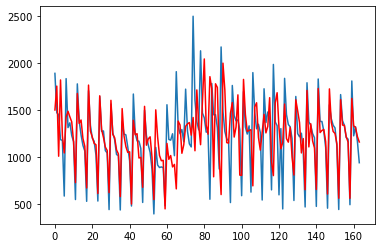

In [78]:
# correct forecasts with a model of forecast residual errors

# create lagged dataset
values = DataFrame(series.values)
dataframe = concat([values.shift(1), values], axis=1)
dataframe.columns = ['t', 't+1']
# split into train and test sets
X = dataframe.values
train_size = int(len(X) * 0.66)
train, test = X[1:train_size], X[train_size:]
train_X, train_y = train[:,0], train[:,1]
test_X, test_y = test[:,0], test[:,1]
# persistence model on training set
train_pred = [x for x in train_X]
# calculate residuals
train_resid = [train_y[i]-train_pred[i] for i in range(len(train_pred))]
# model the training set residuals
model = AR(train_resid)
model_fit = model.fit()
window = model_fit.k_ar
coef = model_fit.params
# walk forward over time steps in test
history = train_resid[len(train_resid)-window:]
history = [history[i] for i in range(len(history))]
predictions = list()
for t in range(len(test_y)):
	# persistence
	yhat = test_X[t]
	error = test_y[t] - yhat
	# predict error
	length = len(history)
	lag = [history[i] for i in range(length-window,length)]
	pred_error = coef[0]
	for d in range(window):
		pred_error += coef[d+1] * lag[window-d-1]
	# correct the prediction
	yhat = yhat + pred_error
	predictions.append(yhat)
	history.append(error)
	print('predicted=%f, expected=%f' % (yhat, test_y[t]))
# error
rmse = sqrt(mean_squared_error(test_y, predictions))
print('Test RMSE: %.3f' % rmse)
# plot predicted error
pyplot.plot(test_y)
pyplot.plot(predictions, color='red')
pyplot.show()

## ARIMA Model for Forecasting

C:\Users\Kyrie\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Kyrie\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                             ARIMA Model Results                              
Dep. Variable:               D.volume   No. Observations:                  480
Model:                 ARIMA(5, 1, 0)   Log Likelihood               -3415.217
Method:                       css-mle   S.D. of innovations            296.084
Date:                Sun, 13 Sep 2020   AIC                           6844.434
Time:                        09:20:52   BIC                           6873.651
Sample:                             1   HQIC                          6855.919
                                                                              
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -1.2808      2.450     -0.523      0.601      -6.083       3.521
ar.L1.D.volume    -1.0340      0.030    -34.596      0.000      -1.093      -0.975
ar.L2.D.volume    -0.9595      0.039

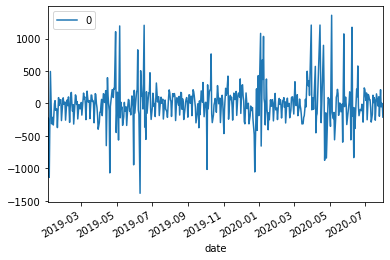

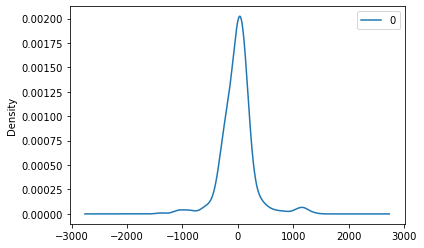

                 0
count   480.000000
mean     -1.957460
std     300.032096
min   -1385.308673
25%    -144.039755
50%       6.947777
75%     109.873151
max    1360.328706


In [79]:
# fit an ARIMA model and plot residual errors

from statsmodels.tsa.arima_model import ARIMA

# fit model
model = ARIMA(series, order=(5,1,0))
model_fit = model.fit(disp=0)
# summary of fit model
print(model_fit.summary())
# line plot of residuals
residuals = DataFrame(model_fit.resid)
residuals.plot()
pyplot.show()
# density plot of residuals
residuals.plot(kind='kde')
pyplot.show()
# summary stats of residuals
print(residuals.describe())

###  Rolling Forecast ARIMA Model

predicted=1498.577671, expected=1892.000000
predicted=1565.308788, expected=1473.000000
predicted=1650.858487, expected=1452.000000
predicted=1616.919764, expected=1187.000000
predicted=1321.791566, expected=1178.000000
predicted=802.185758, expected=586.000000
predicted=1794.013001, expected=1836.000000
predicted=1364.877983, expected=1315.000000
predicted=1417.365397, expected=1366.000000
predicted=1172.061300, expected=1230.000000
predicted=1149.976936, expected=1166.000000
predicted=782.877742, expected=549.000000
predicted=1732.384083, expected=1780.000000
predicted=1230.460762, expected=1386.000000
predicted=1344.805666, expected=1236.000000
predicted=1212.159294, expected=1126.000000
predicted=1130.916869, expected=1066.000000
predicted=739.470725, expected=530.000000
predicted=1681.055249, expected=1708.000000
predicted=1270.297157, expected=1340.000000
predicted=1221.018945, expected=1203.000000
predicted=1113.414356, expected=1169.000000
predicted=1040.749550, expected=1019.0

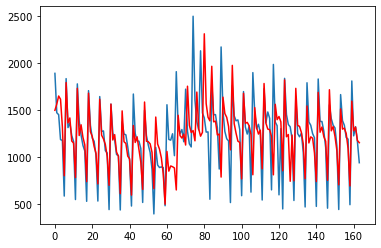

In [80]:
# evaluate an ARIMA model using a walk-forward validation
# split into train and test sets
X = series.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
# walk-forward validation
for t in range(len(test)):
	model = ARIMA(history, order=(5,1,0))
	model_fit = model.fit(disp=0)
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)
	print('predicted=%f, expected=%f' % (yhat, obs))
# evaluate forecasts
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)
# plot forecasts against actual outcomes
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()

## Autocorrelation and Partial Autocorrelation

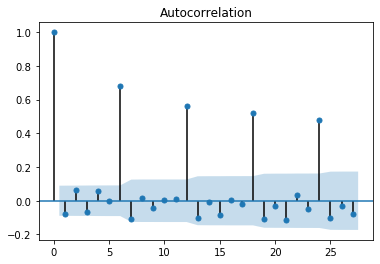

In [81]:
plot_acf(series)
pyplot.show()

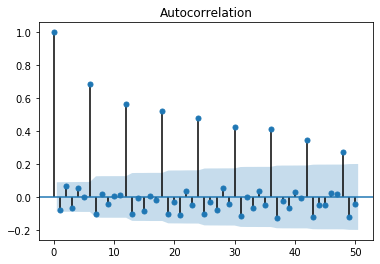

In [82]:
plot_acf(series, lags=50)
pyplot.show()

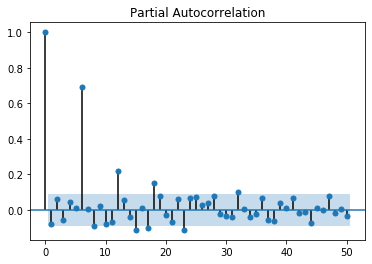

In [83]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(series, lags=50)
pyplot.show()

## Grid Search ARIMA Model Hyperparameters

In [96]:
# grid search ARIMA parameters for time series
import warnings
from math import sqrt
from pandas import Series
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error

# evaluate an ARIMA model for a given order (p,d,q)
def evaluate_arima_model(X, arima_order):
	# prepare training dataset
	train_size = int(len(X) * 0.66)
	train, test = X[0:train_size], X[train_size:]
	history = [x for x in train]
	# make predictions
	predictions = list()
	for t in range(len(test)):
		model = ARIMA(history, order=arima_order)
		model_fit = model.fit(disp=0)
		yhat = model_fit.forecast()[0]
		predictions.append(yhat)
		history.append(test[t])
	# calculate out of sample error
	rmse = sqrt(mean_squared_error(test, predictions))
	return rmse

# evaluate combinations of p, d and q values for an ARIMA model
def evaluate_models(dataset, p_values, d_values, q_values):
	dataset = dataset.astype('float32')
	best_score, best_cfg = float("inf"), None
	for p in p_values:
		for d in d_values:
			for q in q_values:
				order = (p,d,q)
				try:
					rmse = evaluate_arima_model(dataset, order)
					if rmse < best_score:
						best_score, best_cfg = rmse, order
					print('ARIMA%s RMSE=%.3f' % (order,rmse))
				except:
					continue
	print('Best ARIMA%s RMSE=%.3f' % (best_cfg, best_score))

# load dataset
# loaded previously as series
# evaluate parameters
p_values = [0, 1, 2, 4, 6, 8, 10]
d_values = range(0, 3)
q_values = range(0, 3)
warnings.filterwarnings("ignore")
evaluate_models(series.values, p_values, d_values, q_values)

ARIMA(0, 0, 0) RMSE=392.741
ARIMA(0, 0, 1) RMSE=391.016
ARIMA(0, 0, 2) RMSE=391.514
ARIMA(0, 1, 0) RMSE=588.525
ARIMA(0, 1, 1) RMSE=393.732
ARIMA(0, 2, 0) RMSE=1045.109
ARIMA(0, 2, 1) RMSE=589.913
ARIMA(1, 0, 0) RMSE=390.881
ARIMA(1, 0, 1) RMSE=391.621
ARIMA(1, 0, 2) RMSE=385.023
ARIMA(1, 1, 0) RMSE=484.443
ARIMA(1, 1, 1) RMSE=388.404
ARIMA(1, 1, 2) RMSE=401.367
ARIMA(1, 2, 0) RMSE=734.717
ARIMA(2, 0, 0) RMSE=391.320
ARIMA(2, 0, 1) RMSE=386.143
ARIMA(2, 1, 0) RMSE=458.330
ARIMA(2, 1, 1) RMSE=387.855
ARIMA(2, 1, 2) RMSE=398.348
ARIMA(2, 2, 0) RMSE=641.429
ARIMA(4, 0, 0) RMSE=391.666
ARIMA(4, 0, 1) RMSE=407.754
ARIMA(4, 0, 2) RMSE=389.486
ARIMA(4, 1, 0) RMSE=427.486
ARIMA(4, 1, 1) RMSE=377.166
ARIMA(4, 1, 2) RMSE=395.924
ARIMA(4, 2, 0) RMSE=579.693
ARIMA(4, 2, 1) RMSE=429.185
ARIMA(6, 0, 0) RMSE=314.928
ARIMA(6, 0, 1) RMSE=315.437
ARIMA(6, 0, 2) RMSE=316.877
ARIMA(6, 1, 0) RMSE=319.927
ARIMA(6, 1, 1) RMSE=317.146
ARIMA(6, 1, 2) RMSE=322.767
ARIMA(6, 2, 0) RMSE=384.563
ARIMA(6, 2, 1) RMSE

## Save Models and Make Predictions

Once you can build and tune forecast models for your data, the process of making a prediction involves the following steps:
1. Model Selection. This is where you choose a model and gather evidence and support to defend the decision.
2. Model Finalization. The chosen model is trained on all available data and saved to file for later use.
3. Forecasting. The saved model is loaded and used to make a forecast.
4. Model Update. Elements of the model are updated in the presence of new observations.

Best ARIMA(6, 0, 0) RMSE=314.928

## Select Time Series Forecast Model

Test RMSE: 318.756


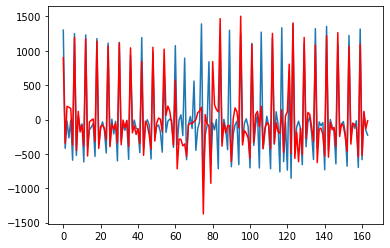

In [87]:
# fit and evaluate an AR model

# create a difference transform of the dataset
def difference(dataset):
	diff = list()
	for i in range(1, len(dataset)):
		value = dataset[i] - dataset[i - 1]
		diff.append(value)
	return numpy.array(diff)

# Make a prediction give regression coefficients and lag obs
def predict(coef, history):
	yhat = coef[0]
	for i in range(1, len(coef)):
		yhat += coef[i] * history[-i]
	return yhat

#series = Series.from_csv('daily-total-female-births.csv', header=0)
# split dataset
X = difference(series.values)
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:]
# train autoregression
model = AR(train)
model_fit = model.fit(maxlag=6, disp=False)
window = model_fit.k_ar
coef = model_fit.params
# walk forward over time steps in test
history = [train[i] for i in range(len(train))]
predictions = list()
for t in range(len(test)):
	yhat = predict(coef, history)
	obs = test[t]
	predictions.append(yhat)
	history.append(obs)
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)
# plot
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()

## Finalize and Save Time Series Forecast Model

In [88]:
# fit an AR model and save the whole model to file

# create a difference transform of the dataset
def difference(dataset):
	diff = list()
	for i in range(1, len(dataset)):
		value = dataset[i] - dataset[i - 1]
		diff.append(value)
	return numpy.array(diff)

# load dataset
# series = Series.from_csv('daily-total-female-births.csv', header=0)
X = difference(series.values)
# fit model
model = AR(X)
model_fit = model.fit(maxlag=6, disp=False)
# save model to file
model_fit.save('ar_model.pkl')
# save the differenced dataset
numpy.save('ar_data.npy', X)
# save the last ob
numpy.save('ar_obs.npy', [series.values[-1]])

In [89]:
# load the AR model from file
from statsmodels.tsa.ar_model import ARResults
import numpy
loaded = ARResults.load('ar_model.pkl')
print(loaded.params)
data = numpy.load('ar_data.npy')
last_ob = numpy.load('ar_obs.npy')
print(last_ob)

[-6.59921439 -1.06647323 -0.9952528  -0.96400976 -0.91107252 -0.79910555
 -0.04494483]
[941.]


Save just the coeficients from the model, as well as the minimum dierenced lag values required
to make the next prediction and the last observation needed to transform the next prediction
made.

In [90]:
# fit an AR model and manually save coefficients to file

# create a difference transform of the dataset
def difference(dataset):
	diff = list()
	for i in range(1, len(dataset)):
		value = dataset[i] - dataset[i - 1]
		diff.append(value)
	return numpy.array(diff)

# load dataset
# LOADED
X = difference(series.values)
# fit model
window_size = 6
model = AR(X)
model_fit = model.fit(maxlag=window_size, disp=False)
# save coefficients
coef = model_fit.params
numpy.save('man_model.npy', coef)
# save lag
lag = X[-window_size:]
numpy.save('man_data.npy', lag)
# save the last ob
numpy.save('man_obs.npy', [series.values[-1]])

In [91]:
# load the manually saved model from file
import numpy
coef = numpy.load('man_model.npy')
print(coef)
lag = numpy.load('man_data.npy')
print(lag)
last_ob = numpy.load('man_obs.npy')
print(last_ob)

[-6.59921439 -1.06647323 -0.9952528  -0.96400976 -0.91107252 -0.79910555
 -0.04494483]
[-698. 1317. -584.   97. -157. -226.]
[941.]


## Make a Time Series Forecast

In [92]:
# load AR model from file and make a one-step prediction
from statsmodels.tsa.ar_model import ARResults
import numpy
# load model
model = ARResults.load('ar_model.pkl')
data = numpy.load('ar_data.npy')
last_ob = numpy.load('ar_obs.npy')
# make prediction
predictions = model.predict(start=len(data), end=len(data))
# transform prediction
yhat = predictions[0] + last_ob[0]
print('Prediction: %f' % yhat)

Prediction: 749.185311


In [94]:
# load a coefficients and from file and make a manual prediction
import numpy
def predict(coef, history):
 yhat = coef[0]
 for i in range(1, len(coef)):
  yhat += coef[i] * history[-i]
 return yhat
# load model
coef = numpy.load('man_model.npy')
lag = numpy.load('man_data.npy')
last_ob = numpy.load('man_obs.npy')
# make prediction
prediction = predict(coef, lag)
# transform prediction
yhat = prediction + last_ob[0]
print('Prediction: %f' % yhat)

Prediction: 749.185311


## Update Forecast Model

In [95]:
# update the data for the AR model with a new obs
import numpy
# get real observation
observation = 48
# load the saved data
data = numpy.load('ar_data.npy')
last_ob = numpy.load('ar_obs.npy')
# update and save differenced observation
diffed = observation - last_ob[0]
data = numpy.append(data, [diffed], axis=0)
numpy.save('ar_data.npy', data)
# update and save real observation
last_ob[0] = observation
numpy.save('ar_obs.npy', last_ob)

In [96]:
# update the data for the manual model with a new obs
import numpy
# get real observation
observation = 48
# update and save differenced observation
lag = numpy.load('man_data.npy')
last_ob = numpy.load('man_obs.npy')
diffed = observation - last_ob[0]
lag = numpy.append(lag[1:], [diffed], axis=0)
numpy.save('man_data.npy', lag)
# update and save real observation
last_ob[0] = observation
numpy.save('man_obs.npy', last_ob)

## Forecast Confidence Intervals

In [105]:
# summarize the confidence interval on an ARIMA forecast
from statsmodels.tsa.arima_model import ARIMA
# load dataset
#loaded as series
# split into train and test sets
X = series.values
X = X.astype('float32')
size = len(X) - 1
train, test = X[0:size], X[size:]
# fit an ARIMA model
model = ARIMA(train, order=(6,0,0))
model_fit = model.fit(disp=False)
# forecast
forecast, stderr, conf = model_fit.forecast()
# summarize forecast and confidence intervals
print('Expected: %.3f' % test[0])
print('Forecast: %.3f' % forecast)
print('Standard Error: %.3f' % stderr)
print('95%% Confidence Interval: %.3f to %.3f' % (conf[0][0], conf[0][1]))

Expected: 941.000
Forecast: 1164.452
Standard Error: 293.604
95% Confidence Interval: 588.999 to 1739.906


In [107]:
# summarize multiple confidence intervals on an ARIMA forecast
# split data into train and test setes
X = series.values
X = X.astype('float32')
size = len(X) - 1
train, test = X[0:size], X[size:]
# fit an ARIMA model
model = ARIMA(train, order=(6,0,0))
model_fit = model.fit(disp=False)
# summarize confidence intervals
intervals = [0.2, 0.1, 0.05, 0.01]
for a in intervals:
 forecast, stderr, conf = model_fit.forecast(alpha=a)
 print('%.1f%% Confidence Interval: %.3f between %.3f and %.3f' % ((1-a)*100, forecast,
  conf[0][0], conf[0][1]))

80.0% Confidence Interval: 1164.452 between 788.183 and 1540.722
90.0% Confidence Interval: 1164.452 between 681.516 and 1647.389
95.0% Confidence Interval: 1164.452 between 588.999 and 1739.906
99.0% Confidence Interval: 1164.452 between 408.178 and 1920.727


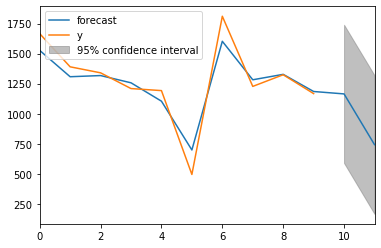

In [108]:
# plot some history and the forecast with confidence intervals
model_fit.plot_predict(len(train)-10, len(train)+1)
pyplot.legend(loc='upper left')
pyplot.show()